Total images: 5712
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


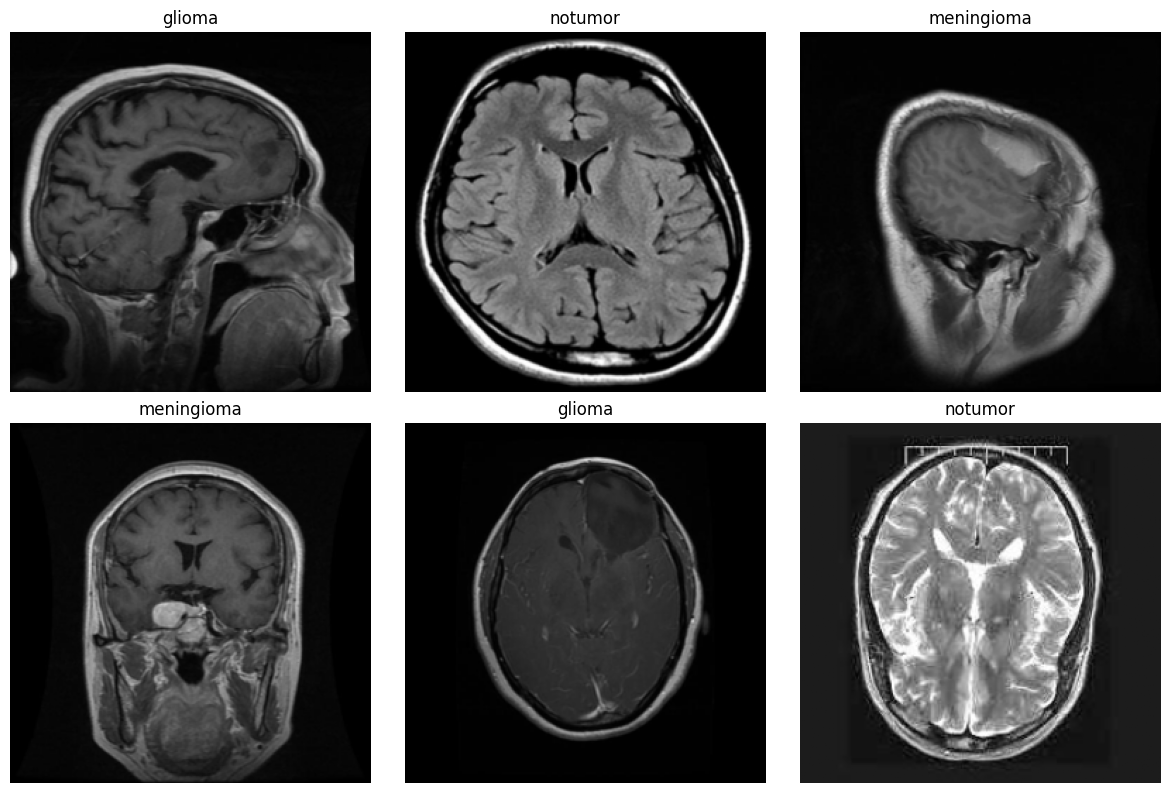

In [ ]:
import os # lets you work with directories and file paths
import random # used to randomly pick images to display
import matplotlib.pyplot as plt #used to plot and display images
from PIL import Image #used to open and process image files
from torchvision import transforms #common image transformations
from torch.utils.data import Dataset, DataLoader #imported dataset from torch (tools used for handling datasets)

# -------------------------------------------------------
# 1. Create Costum Dataset Class
# -------------------------------------------------------

# write custom dataset file --> preprocess the data to have the data in a form that we can use to continue
class BrainTumorDataset(Dataset): 
# class = keyword that says “I’m creating a new type of object.”
# BrainTumorDataset = the name of the class (by convention: capital letters at the start).
# class = keyword that says “I’m creating a new type of object.”
# (Dataset) means: “this class inherits from Dataset”
# Dataset is a PyTorch class that defines the basic structure for datasets.
# By inheriting from it, you promise to implement at least __len__ and __getitem__.

    def __init__(self, root_dir, transform=None): # self = object itself, root_dir = the path to your main folder with images
        self.root_dir = root_dir # create an object and store the root in it
        self.transform = transform # preprocessing/augmentation applied to each image

        self.classes = sorted(os.listdir(root_dir)) # goes inside the folder and finds subfolders like: glioma, meningioma, etc.
        # os.listdir(root_dir) looks inside the folder root_dir & returns a list of names (files & folders) inside it
        # sorted(...) -> sorts that list alphabetically so you always have the same order. 
        # self.classes = ... -> saves that sorted list as an attribute on your dataset object.
        self.image_paths = [] # stores the full path to every image file
        self.labels = [] # store one label number for each image

        for idx, cls in enumerate(self.classes): # goes through the list self.classes and gives idx = index and cls = class names
            class_folder = os.path.join(root_dir, cls)
            if not os.path.isdir(class_folder):
                continue # “If this thing is not a folder, skip it; don’t try to read images from it.”
            for img_name in os.listdir(class_folder): # go through every file inside this class folder
                img_path = os.path.join(class_folder, img_name) # Combines folder + filename into a full path, e.g. -> → "data/Training/glioma/image_001.png" (what we need to open the image)
                if img_name.lower().endswith((".png", ".jpg", ".jpeg")): #“If the file is a PNG or JPG image, then process it; otherwise ignore it.”
                    self.image_paths.append(img_path) # add path to the list
                    self.labels.append(idx) # add the numeric label to the list

    def __len__(self):
        return len(self.image_paths) # return number of images stored

    def __getitem__(self, index): # Defines what happens when you do: dataset[index].
        img_path = self.image_paths[index] # Looks up the index-th image path and label from the lists you created earlier.
        label = self.labels[index] # plus the corresponding label

        image = Image.open(img_path).convert("RGB") # Image.open(img_path) uses PIL to open the image file. .convert("RGB") ensures the image has 3 color channels (Red, Green, Blue). Some images might be grayscale or have alpha; this standardizes them.
        # now image is a PIL image object
        if self.transform: # checks whether a transformation function was given (in this case not)
            image = self.transform(image)

        return image, label # returns a tuple (image, label) -> what you get when you do dataset[index].
    
# In this first part, you created a custom PyTorch dataset class that:
# 1) Finds all the image files inside your dataset folder (e.g., glioma/, meningioma/, etc.)
# 2) Assigns a numeric label to each class (glioma = 0, meningioma = 1, …)
# 3) Builds a list of all image paths and labels → these become the data your model trains on
# 4) Defines how to load a single image every time you request dataset[i]
# 5) Applies optional preprocessing transforms (resize, convert to tensor, augmentation)
# You basically created the machine that tells PyTorch: “Here is how you should access my images, one by one.”
# This is data preparation/dataset creation -> building a PyTorch Dataset


# “We implemented a custom PyTorch Dataset class to organize the MRI images into a structured format for model training. 
# The class automatically scans the dataset directory, identifies subfolders corresponding to each tumor type, assigns class labels, and loads individual images 
# with standardized preprocessing (RGB conversion and optional transformations such as resizing and tensor conversion). This dataset object allows efficient indexing and 
# integration with PyTorch’s DataLoader for batch processing during training.”

In [ ]:
# -------------------------------------------------------
# 2. Load Dataset
# -------------------------------------------------------

# define the tranform pipeline
# transforms.Compose([...]) creates a pipeline of image transformations.
transform = transforms.Compose([ #can do a lot of things, rotate the images, mirror it, etc. (preprocessing/augmentation) --> try to avoid overfitting
    transforms.Resize((256, 256)), #Every image is resized so that it becomes 256×256 pixels (unwritten convention)
    transforms.ToTensor(), 
    # transform it to tensors (easier to handle in AI models) --> mathemtical object, which can hold arrays, vectors as well (like lists but made to work in multidimensions)
    # Converts the image from a PIL image (like a normal picture) into a PyTorch tensor, the format ML models use. Also rescales pixel values from 0–255 → 0–1.
])


dataset_path = "data/Training"  # set path to dataset
# run the class on the data
dataset = BrainTumorDataset(dataset_path, transform=transform) # the actual dataset is with a lowercase letter at the beggining

print(f"Total images: {len(dataset)}") # how many images
print("Classes:", dataset.classes) # what classes

Total images: 5712
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


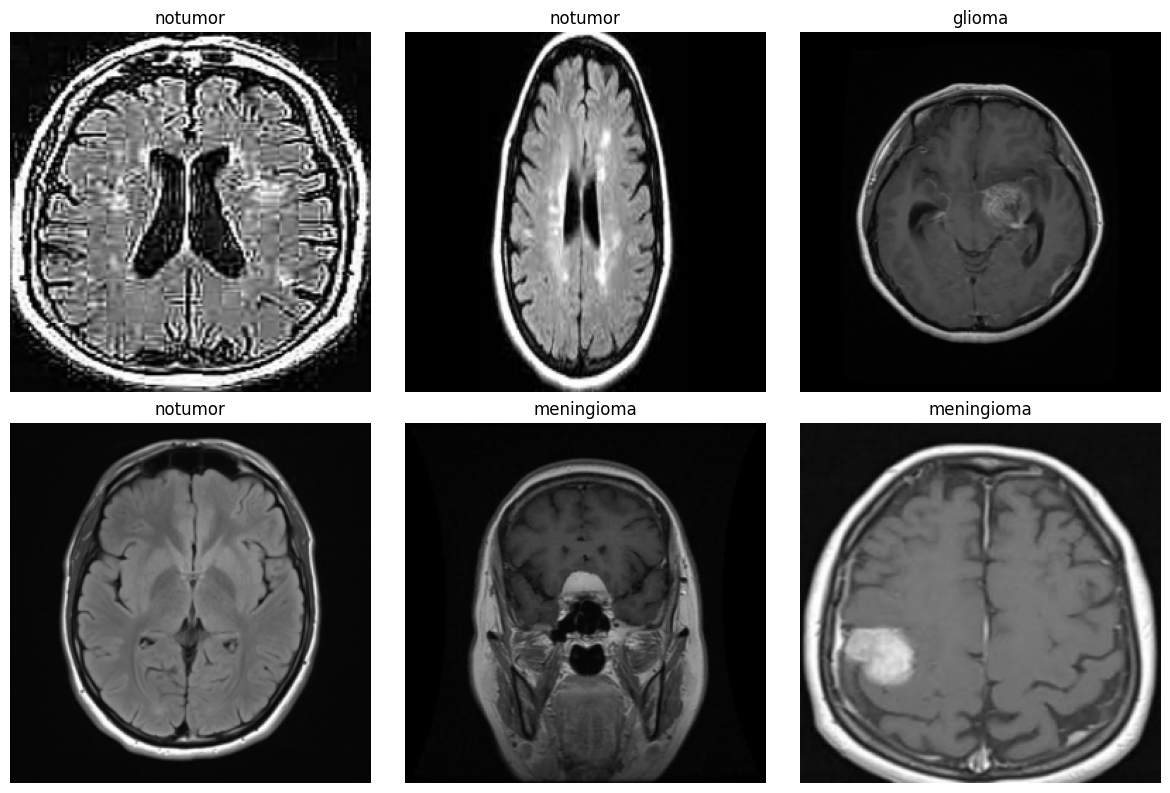

In [14]:
# -------------------------------------------------------
# 3. Display Random Images
# -------------------------------------------------------

def show_random_images(dataset, num_images=6): # defines a function that shows random images, input is the dataset and it will show 6 images
    plt.figure(figsize=(12, 8)) # figure = creates a new canvas on which you can draw plots, set the size of the figure in inches (create a big figure to arrange multiple images nicely)
    for i in range(num_images): # for each of the six images
        idx = random.randint(0, len(dataset)-1) #pick a random index from the dataset
        image, label = dataset[idx]
    # dataset[idx] → calls __getitem__(self, index) in your BrainTumorDataset class.
    # It: gets the image path at that index, opens the image, converts to RGB, applies the transform (resize + ToTensor), returns (image, label)
    # “Load the randomly chosen image and its class label from the dataset.”
        image_np = image.permute(1, 2, 0).numpy() #change images back to normal numbers, because you can't plot PyTorch tensors (format Channel, height, width), but matplotlib expects format (height, width, channels)
        # image permutate reorders the dimensions and numpy converts tensor to a NumPy array
        plt.subplot(2, 3, i+1) # creates a grid of plots inside the figure, 2 rows, 3 columns and always the next one (i+1)
        plt.imshow(image_np) #display the images
        plt.title(dataset.classes[label]) # add the label
        plt.axis("off") # no axis names

    plt.tight_layout() # neaten up layout, automatically adjusts the spacing between subplots so there is no overlap between images and titles
    plt.show() # actually display the giure window

show_random_images(dataset, num_images=6) # call the function

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# define the model: CNN
# take already existing NN modules and define our class
class CNN_network(nn.Module): # define the class
    def __init__(self): # constructor
        super(CNN_network, self).__init__() # super --> copy everything from the NN modules
        # set up the neural network and inherit all PyTorch behaviour

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1) # 3 = colour channels, 16 = outchannels (channels produced by the convolution), kernel size = size of the kernel (= filter) --> downsizes the image, padding: at the corners we can't average because we the image is done -> to not use the information you do padding
        # first layer: 3 input channels, 16 output channels, 3x3 kernel, stride of 1, padding 1 (adds 1 pixel around border)
        # therefor: input image 3x256x256 and output 16x256x256
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        # 2nd convolutional layer

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # reduces image size by half: ouput 128x128, uses the max value for pooling

        self.dropout = nn.Dropout(0.25) 
        # regularisation --> every 4th node is set to zero

        self.fc1 = nn.Linear(32 * 64 * 64, 128) 
        # first dense (linear layer after convolution)
        # channels = 16, height = 128, witdh = 128
        # fc1 maps the huge vector down to 128 neurons

        self.fc2 = nn.Linear(256, 128) 

        self.fc3 = nn.Linear(128, 4)  
        # Assuming 4 classes (converge to 4 classes) = output layer

    def forward(self, x): # run the machine
        x = self.conv1(x) # convolution, applies the convolution filter
        x = F.relu(x) # activation function
        x = self.pool(x) # pooling

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = torch.flatten(x, 1) # flatten the matrix

        x = self.fc1(x) #pass it to the first hidden layer
        x = F.relu(x) # activation function
        x = self.dropout(x) #regularisation (dropout nodes randomly)

        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout(x)

        x = self.fc3(x) # produces the 4 logits
        return x



Epoch 1 Completed — Average Loss: 0.8869
Epoch 2 Completed — Average Loss: 0.3919
Epoch 3 Completed — Average Loss: 0.2631
Epoch 4 Completed — Average Loss: 0.1781
Epoch 5 Completed — Average Loss: 0.1158
Epoch 6 Completed — Average Loss: 0.0885
Epoch 7 Completed — Average Loss: 0.0702
Epoch 8 Completed — Average Loss: 0.0575
Epoch 9 Completed — Average Loss: 0.0418
Epoch 10 Completed — Average Loss: 0.0425

✅ Finished Training


📉 GRADIENT DESCENT EXPLANATION:
- Each point is the loss after a batch.
- The optimizer adjusts weights to move downhill.
- The smoothed curve shows the overall descent.

⚡ LR EXPLANATION:
- LR controls how big each step of gradient descent is.
- High LR = bigger jumps; Low LR = smaller, precise steps.


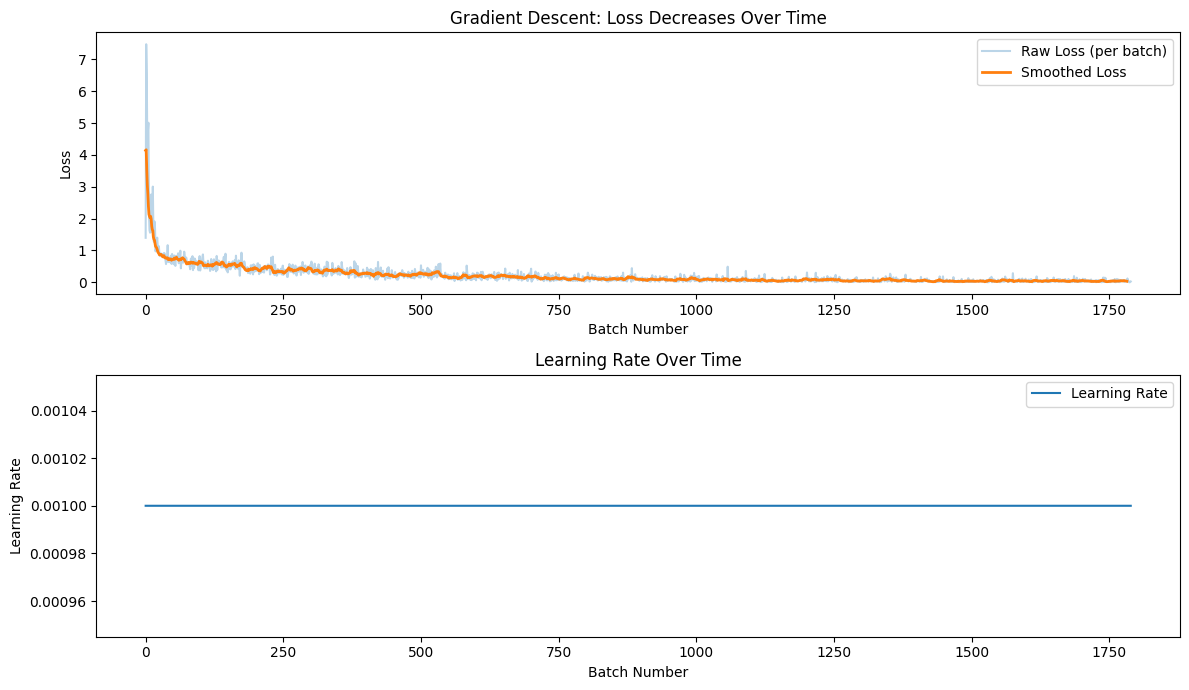

In [10]:
# Train the model/ create pipeline
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

trainloader = DataLoader(dataset, batch_size=32, shuffle=True) 
# load batches of images, batch size of 32, shuffle = True randomises the order each epoch

# -----------------------------------------------------------------------
# Improved loss plotting function that explains gradient descent behavior
# -----------------------------------------------------------------------
def plot_training_progress(loss_history, lr_history):
    """
    Shows:
    - Raw loss per batch (noisy curve)
    - Smoothed loss curve (true descent trend)
    - Learning rate per batch
    """

    if not loss_history:
        print("No loss data recorded.")
        return

    # Convert to numpy for easier processing
    loss_history = np.array(loss_history)
    lr_history = np.array(lr_history)

    # Smooth loss curve – moving average
    window = max(5, len(loss_history) // 200)
    smooth_loss = np.convolve(loss_history, np.ones(window)/window, mode='valid')

    plt.figure(figsize=(12, 7))

    # -----------------------------
    # Plot 1 — Loss curve (Gradient Descent visualization)
    # -----------------------------
    plt.subplot(2, 1, 1)
    plt.plot(loss_history, alpha=0.3, label="Raw Loss (per batch)")
    plt.plot(np.arange(len(smooth_loss)), smooth_loss, linewidth=2, label="Smoothed Loss")

    plt.title("Gradient Descent: Loss Decreases Over Time")
    plt.xlabel("Batch Number")
    plt.ylabel("Loss")
    plt.legend()

    # Explanation for beginners
    print("\n📉 GRADIENT DESCENT EXPLANATION:")
    print("- Each point is the loss after a batch.")
    print("- The optimizer adjusts weights to move downhill.")
    print("- The smoothed curve shows the overall descent.")

    # -----------------------------
    # Plot 2 — Learning rate curve
    # -----------------------------
    plt.subplot(2, 1, 2)
    plt.plot(lr_history, label="Learning Rate")
    plt.title("Learning Rate Over Time")
    plt.xlabel("Batch Number")
    plt.ylabel("Learning Rate")
    plt.legend()

    print("\n⚡ LR EXPLANATION:")
    print("- LR controls how big each step of gradient descent is.")
    print("- High LR = bigger jumps; Low LR = smaller, precise steps.")

    plt.tight_layout()
    plt.show()


# -----------------------------------------------------------------------
# TRAINING CODE 
# -----------------------------------------------------------------------
 
criterion = nn.CrossEntropyLoss() # define loss function
model = CNN_network() # create model

# Adam controls the learning rate dynamically each batch
optimizer = optim.Adam(model.parameters(), lr=0.001) # define optimiser and learning rate

device = torch.device("mps") # apple GPU
model.to(device) # move the entire CNN onto the GPU

# lists to store training
loss_history = []
lr_history = []  # Track learning rate each batch (Adam internally adjusts learning rate)


for epoch in range(10): # run training for 10 epochs
    running_loss = 0.0 # tracks average loss per epoch
    model.train() 

    for i, (images, labels) in enumerate(trainloader): # loop through batches

        images, labels = images.to(device), labels.to(device) # model is on GPU, data most also be on GPU

        # 1. RESET GRADIENTS
        optimizer.zero_grad()

        # 2. FORWARD PASS — model makes prediction
        outputs = model(images) # calls the forward method

        # 3. COMPUTE LOSS — measures how wrong predictions are
        loss = criterion(outputs, labels)

        # Save the loss
        loss_history.append(loss.item()) # item converts tensor to float

        # Save current LR for visualization
        current_lr = optimizer.param_groups[0]['lr'] # record current learning rate
        lr_history.append(current_lr)

        # 4. BACKWARD PASS — compute gradients for all parameters
        loss.backward()

        # 5. UPDATE WEIGHTS — gradient descent step
        optimizer.step()

        running_loss += loss.item() # to compute average loss

    print(f"Epoch {epoch+1} Completed — Average Loss: {running_loss/len(trainloader):.4f}")

print("\n✅ Finished Training\n")

plot_training_progress(loss_history, lr_history)
